本文探讨了Sklearn中tree目录下几种Tree结构

主要参考文献
- Understanding the decision tree structure. http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
- Github sklearn Tree definition. https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/_tree.pyx

待探索的问题：
- DecisionTreeClassifer，DecisionTreeRegressor的区别
- DecisionTreeClassifer，ExtraTreeClassifer的区别

In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
import graphviz 
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
iris.data[:10], iris.target[:10]

(array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [3]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
X.shape, y.shape

((150, 4), (150,))

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Bug 测试

In [9]:
impurity = clf.tree_.impurity
mean_imp = np.mean(impurity)
impurity, mean_imp

(array([ 0.66470026,  0.        ,  0.49564444,  0.15277778,  0.        ,
         0.375     ,  0.        ,  0.        ,  0.04996713,  0.375     ,
         0.        ,  0.        ,  0.        ]), 0.1625453541703436)

In [12]:
pass_node_id_lt = np.where(impurity <= mean_imp)[0]
node_id_lt = clf.apply(X_train)
pass_node_id_lt, node_id_lt, np.sort(np.unique(node_id_lt))

(array([ 1,  3,  4,  6,  7,  8, 10, 11, 12], dtype=int64),
 array([ 4,  4, 12,  1, 12,  1,  1,  4, 12, 12, 10, 12,  4, 12,  4,  4,  6,
        10,  6, 12,  4, 12,  4,  1, 12,  4,  4,  4,  4, 12,  1,  1, 12,  4,
         1,  1,  4,  1, 12,  4,  1,  4, 12,  4,  1, 12, 12, 12, 12,  1,  1,
        12, 12,  1, 12,  1, 12, 12,  1,  1, 10,  1,  1,  1,  4, 12, 12,  1,
         1,  1,  4,  4,  1,  1,  4,  1, 12,  4, 12,  4,  1,  6,  1, 12,  1,
         1, 12,  1, 12,  4,  4,  4, 12, 12,  4, 11,  1,  4, 12, 12,  1,  4,
         4,  7,  4,  1,  1,  1, 12,  4, 12,  1], dtype=int64),
 array([ 1,  4,  6,  7, 10, 11, 12], dtype=int64))

In [16]:
clf.tree_.feature, clf.tree_.children_left, clf.tree_.children_right

(array([ 3, -2,  2,  3, -2,  1, -2, -2,  3,  3, -2, -2, -2], dtype=int64),
 array([ 1, -1,  3,  4, -1,  6, -1, -1,  9, 10, -1, -1, -1], dtype=int64),
 array([ 2, -1,  8,  5, -1,  7, -1, -1, 12, 11, -1, -1, -1], dtype=int64))

In [31]:
a = np.where(clf.tree_.children_left == -1)[0]
b = np.where(clf.tree_.children_right == -1)[0]
c = np.where(clf.tree_.feature == -2)[0]
d = np.where(clf.tree_.threshold == -2)[0]
assert (a == b).all() and (a == c).all() and (a == d).all()

In [33]:
clf.tree_.impurity[a]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [32]:
a

array([ 1,  4,  6,  7, 10, 11, 12], dtype=int64)

In [15]:
clf.tree_.threshold

(array([ 0.80000001, -2.        ,  4.94999981,  1.6500001 , -2.        ,
         3.0999999 , -2.        , -2.        ,  1.75      ,  1.6500001 ,
        -2.        , -2.        , -2.        ]),
 array([ 1, -1,  3,  4, -1,  6, -1, -1,  9, 10, -1, -1, -1], dtype=int64))

# 功能1：导出决策树图，需要宿主机安装graphviz插件并将bin目录加入path变量

In [33]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("./output/iris") 

'./output/iris.pdf'

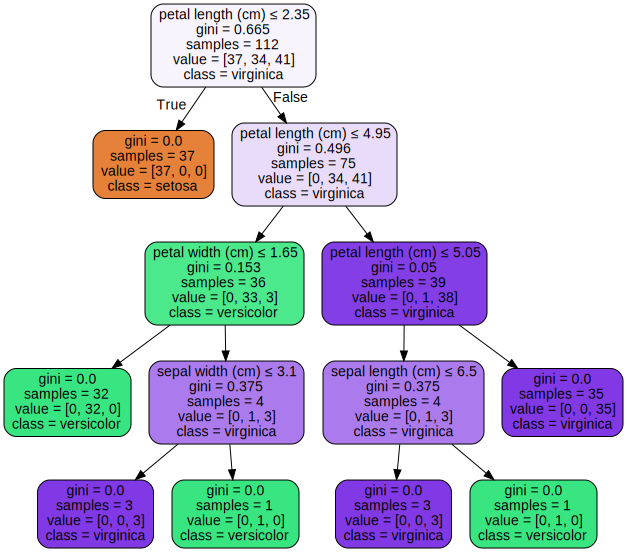

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# 功能2：探讨sklearn中的tree结构 - 重要属性

In [14]:
estimator = clf

In [37]:
print(dir(estimator.tree_))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'apply', 'capacity', 'children_left', 'children_right', 'compute_feature_importances', 'decision_path', 'feature', 'impurity', 'max_depth', 'max_n_classes', 'n_classes', 'n_features', 'n_node_samples', 'n_outputs', 'node_count', 'predict', 'threshold', 'value', 'weighted_n_node_samples']


In [15]:
# tree 中的重要属性
n_nodes = estimator.tree_.node_count # 树的节点个数
children_left = estimator.tree_.children_left # 所有节点的左子树索引 -1为叶子节点
children_right = estimator.tree_.children_right # 所有节点的右子树索引 -1为叶子节点
feature = estimator.tree_.feature # 所有节点的特征索引 -2为叶子节点
threshold = estimator.tree_.threshold # 所有节点的阈值 -2为叶子节点
value = estimator.tree_.value # 所有节点的N个类的个数 
impurity = estimator.tree_.impurity # 所有节点的不纯度
sample = estimator.tree_.n_node_samples # 所有节点所有的

In [45]:
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 17 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 3] <= 0.800000011921 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 3] <= 1.75 else to node 12.
		node=3 test node: go to node 4 if X[:, 2] <= 4.94999980927 else to node 7.
			node=4 test node: go to node 5 if X[:, 3] <= 1.65000009537 else to node 6.
				node=5 leaf node.
				node=6 leaf node.
			node=7 test node: go to node 8 if X[:, 3] <= 1.54999995232 else to node 9.
				node=8 leaf node.
				node=9 test node: go to node 10 if X[:, 2] <= 5.44999980927 else to node 11.
					node=10 leaf node.
					node=11 leaf node.
		node=12 test node: go to node 13 if X[:, 2] <= 4.85000038147 else to node 16.
			node=13 test node: go to node 14 if X[:, 1] <= 3.09999990463 else to node 15.
				node=14 leaf node.
				node=15 leaf node.
			node=16 leaf node.



# 功能3：探讨sklearn中的tree结构 - 重要函数

In [22]:
# tree 中的重要函数
estimator.decision_path # 返回实例所经历的路径的类 node_indicator
node_indicator.indices # node_indicator的节点ID路径列表
node_indicator.toarray() # node_indicator的节点noe hot
node_indicator.indptr # node_indicator的节点在数组中的索引
estimator.apply # 返回实例所对应的节点ID

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

In [41]:
node_indicator = estimator.decision_path(X_test[:2])

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(X_test[:2])

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]


In [30]:
print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] != node_id:
        continue

    print(leave_id[sample_id])
    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             X_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

Rules used to predict sample 0: 
12
decision id node 12 : (X_test[0, -2] (= 5.1) > -2.0)


In [31]:
# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))


The following samples [0, 1] share the node [0 2] in the tree
It is 15.384615384615385 % of all nodes.
